## Author- Shadan Ansari

## Data Science intern at Letsgrowmore

## Batch: December 2021

## Task1: Iris Flower Classification ML Project

## Level: Beginner

## Dataset Link: http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

# Importing Necessary library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC


## Importing Dataset

In [21]:
column_names = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Species']
df = pd.read_csv("iris.data", names = column_names )
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.tail()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Getting the size of the Dataset

In [28]:
 df_size= df.shape
print(f"Number of Rows : {df_size[0]}") 
print(f"Number of Columns : {df_size[1]}")

Number of Rows : 150
Number of Columns : 5


### Checking the null values

In [30]:
df.isnull()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [32]:
df.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

### Checking the Information of the Dataset

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  149 non-null    float64
 1   Sepal_width   149 non-null    float64
 2   Petal_length  149 non-null    float64
 3   Petal_width   149 non-null    float64
 4   Species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Describing the Statistical measures of the Dataset

In [34]:
data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for unique Species

In [36]:
unique_species = df['Species'].unique()
unique_species = unique_species.tolist()
unique_species

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

There are **three types of flowers** present in the dataset. They are **'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'**.

### Checking the number of each Species 

In [37]:
species_count = df['Species'].value_counts()
count = species_count.tolist()
species_count.to_frame()

,Species
Iris-virginica,50
Iris-versicolor,50
Iris-setosa,50


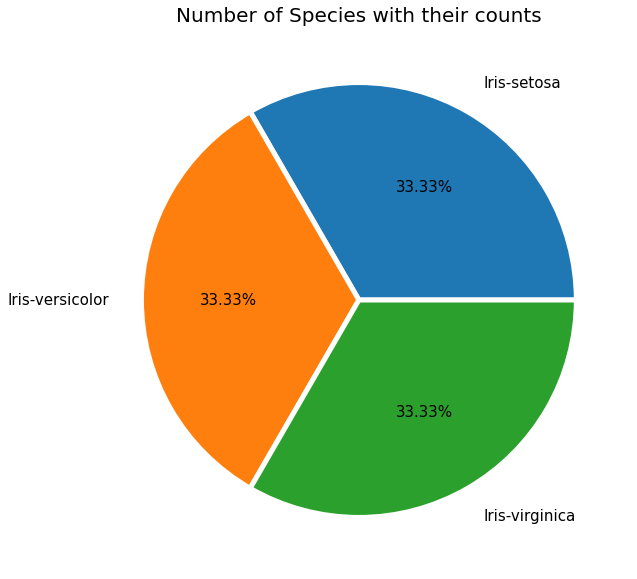

In [42]:
plt.figure(figsize = (10,10))
textprops = {"fontsize":15}
plt.pie(count, labels = unique_species, labeldistance = 1.15, wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
        autopct = "%1.2f%%", textprops = textprops)
plt.title("Number of Species with their counts", fontsize = 20)
plt.show()

# Data Visualization

## Graphs for each of the feature vs Species

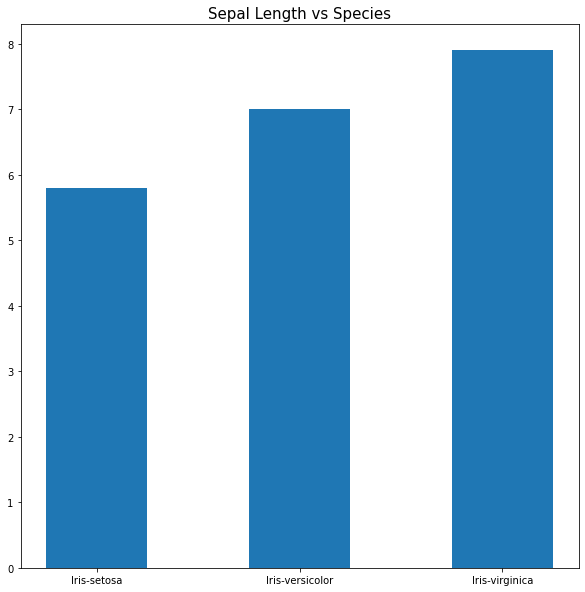

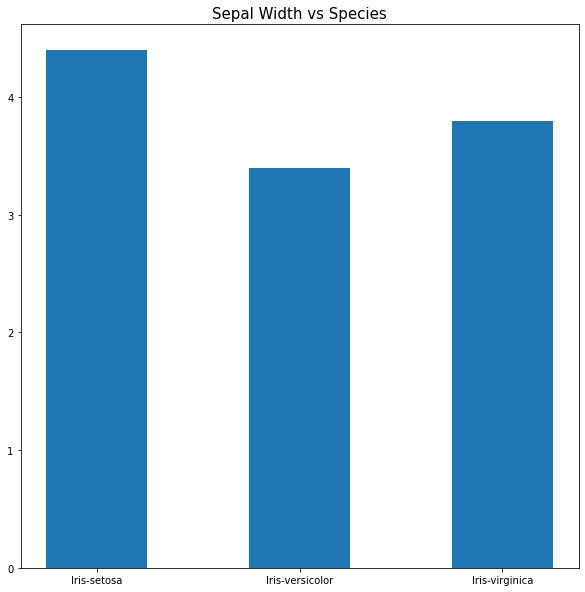

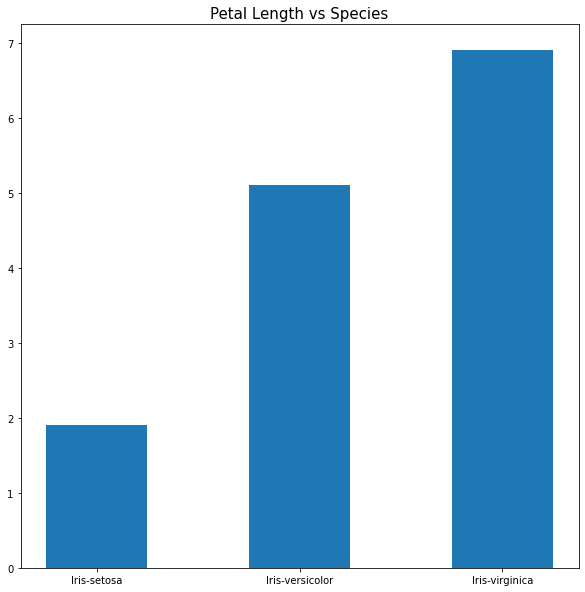

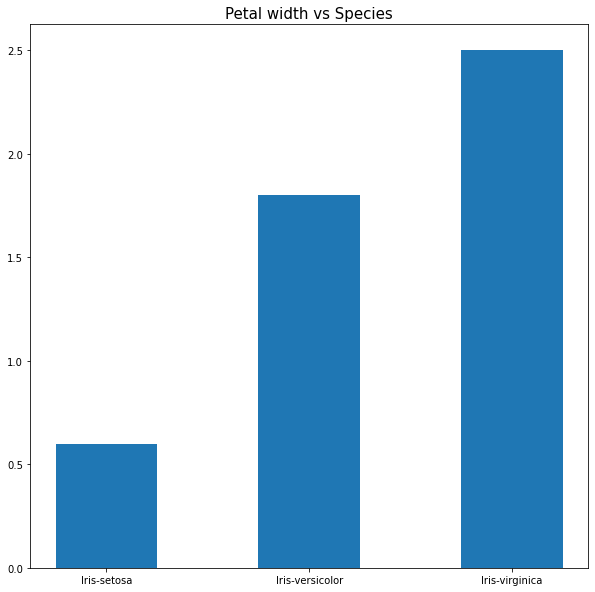

In [48]:
# Sepal Length vs Type
plt.figure(figsize=(10,10))
plt.bar(df['Species'],df['Sepal_length'], width = 0.5) 
plt.title("Sepal Length vs Species", fontsize= 15)
plt.show()

# Sepal Width vs Type
plt.figure(figsize=(10,10))
plt.bar(df['Species'],df['Sepal_width'], width = 0.5) 
plt.title("Sepal Width vs Species", fontsize= 15)
plt.show()

# Petal Length vs Type
plt.figure(figsize=(10,10))
plt.bar(df['Species'],df['Petal_length'], width = 0.5) 
plt.title("Petal Length vs Species", fontsize= 15)
plt.show()

# Petal Width vs Type
plt.figure(figsize=(10,10))
plt.bar(df['Species'],df['Petal_width'], width = 0.5) 
plt.title("Petal width vs Species", fontsize= 15)
plt.show()

### Checking the correlation

In [49]:
correlation = df.corr()
correlation

,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.109369,0.871754,0.817954
Sepal_width,-0.109369,1.000000,-0.420516,-0.356544
Petal_length,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.817954,-0.356544,0.962757,1.000000


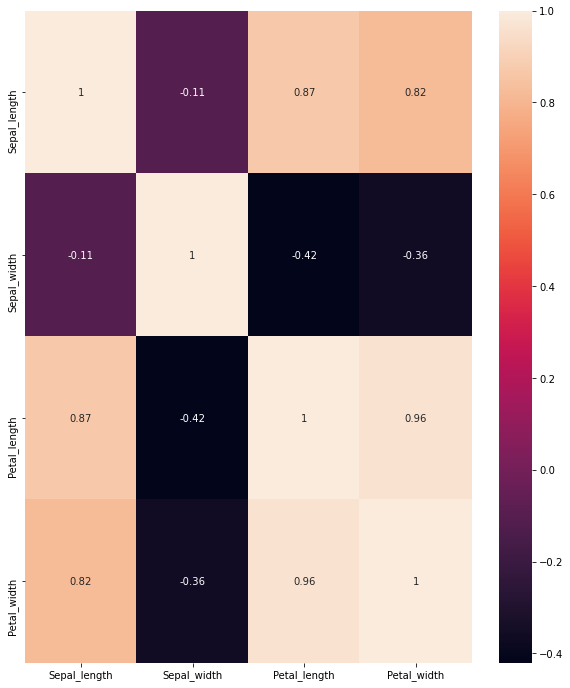

In [50]:
# Finding the pairwaise correlation between the column and visualising the correlation through heatmap
import seaborn as sns
df.corr()
plt.figure(figsize= (10,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Data Preparation

In [51]:
from sklearn import preprocessing

X = df.iloc[:, 0:4]
X.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
Y = df['Species']
Y = Y.values
Y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

## Normalization of the Dataset


In [54]:
std = preprocessing.StandardScaler()
X = std.fit_transform(X)
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

## Splitting dataset into Train and Test sets.

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(X,Y, test_size = 0.2, random_state = 1)
print("x_train :" + str(x_train.shape))
print("x_test :" + str(x_test.shape))
print("y_train :" + str(y_train.shape))
print("y_test :" + str(y_test.shape))

x_train :(120, 4)
x_test :(30, 4)
y_train :(120,)
y_test :(30,)


# Model Creation

# Support Vector Machine Algorithm

### Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms,
###  which is used for Classification as well as Regression problems. 

In [59]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC


model = []
model.append(('SVC', SVC(gamma = 'auto')))


In [61]:
model = SVC(gamma = 'auto')
model.fit(x_train, y_train)

prediction = model.predict(x_test)


###  Now checking the accuracy of the model

In [65]:
print('Test Accuracy Score is: ', accuracy_score(y_test, prediction))
print('\n')
print('Classification Report: ', classification_report(y_test, prediction))

Test Accuracy Score is:  0.9666666666666667


Classification Report:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Conclusion

### For this model, the accuracy on the test set is 96%, which means the model made the right prediction for 96% of the Iris in the given dataset. we can expect the model to be correct 96% of the time for predicting the species of new iris. This is high level of accuracy and it means that our model may be trustworthy enough to use.


#  Thank you................................